In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = 0.7
c = 0.3

X = np.arange(0, 1, 0.02)
y = m*X +  c

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (50,)
Shape of y =  (50,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [4]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)

Shape of X_train =  (40,)
Shape of y_train =  (40,)


In [5]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test = y_test, predictions=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train, y_train, c='b', s=10, label="Training Data")
    plt.scatter(X_test, y_test, c='r', s=10, label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=10, label = "predicted data")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter plot of X and y")

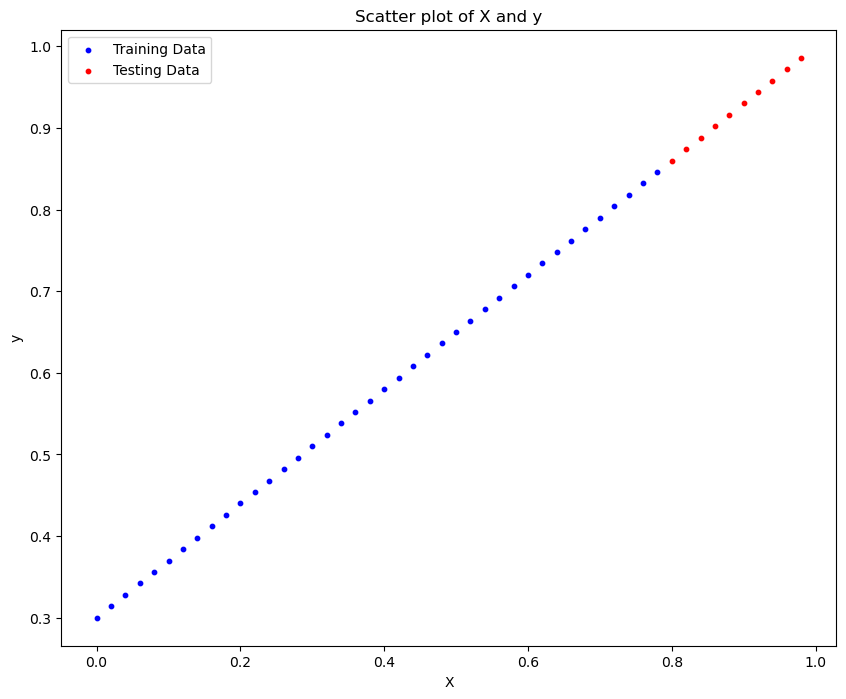

In [6]:
plot_data()

In [16]:
W = np.random.randn(1) 
b = np.random.randn(1)
W, b

(array([-0.02903152]), array([-0.85149311]))

In [8]:
y_out = W * X_test + b
y_out

array([1.08387227, 1.07376197, 1.06365166, 1.05354135, 1.04343104,
       1.03332074, 1.02321043, 1.01310012, 1.00298981, 0.99287951])

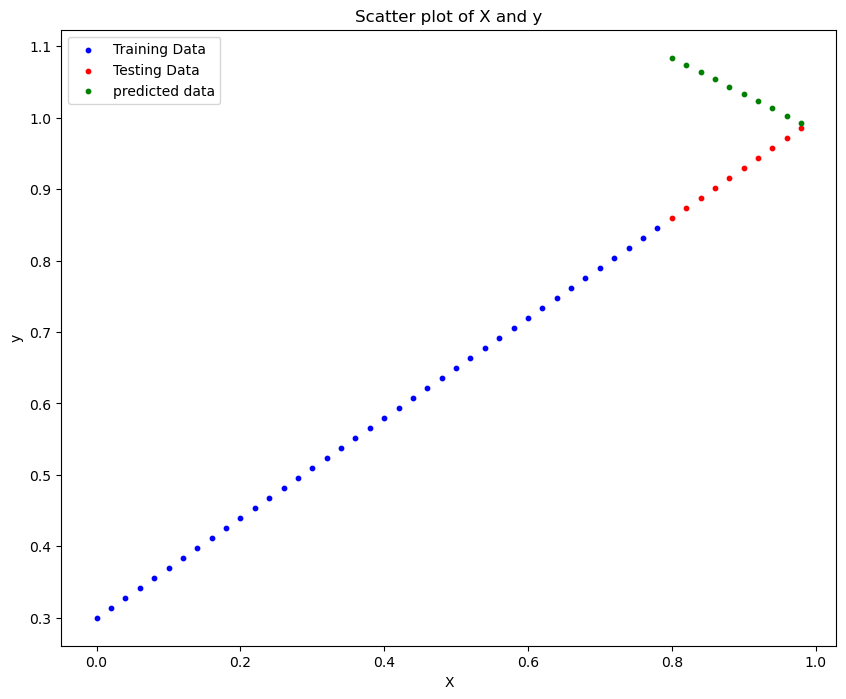

In [9]:
plot_data(predictions=y_out)

In [10]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true, - y_pred)) / len(y_true)

In [18]:
epochs = 1000
alpha = 0.1
trainLossList = []
testLossList = []

for epoch in range(epochs):
    y_pred = X_train * W + b

    train_loss = loss_fn(y_true=y_train, y_pred=y_pred)
    trainLossList.append(train_loss)

    gradientW = (-2 * np.sum((y_train - y_pred) * X_train))/ len(y_train)
    gradientB = (-2 * np.sum(y_train - y_pred)) / len(y_train)

    W = W - alpha * gradientW
    b = b - alpha * gradientB
    
    test_pred = X_test * W + b
    test_loss = loss_fn(y_test, test_pred)
    testLossList.append(test_loss)

    if (epoch % 100 == 0):
        print(f"Ecoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")
        print("w: ", gradientW)

Ecoch: 0 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -1.98193924774559e-06
Ecoch: 100 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -7.869465373023798e-07
Ecoch: 200 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -3.124640945852408e-07
Ecoch: 300 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -1.240666370331267e-07
Ecoch: 400 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -4.926175737368643e-08
Ecoch: 500 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -1.9559817125591738e-08
Ecoch: 600 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -7.766398719077916e-09
Ecoch: 700 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -3.0837174098685693e-09
Ecoch: 800 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -1.2244173112629931e-09
Ecoch: 900 | Train Loss: 0.35445 | Test Loss: 0.85355
w:  -4.861657034727075e-10


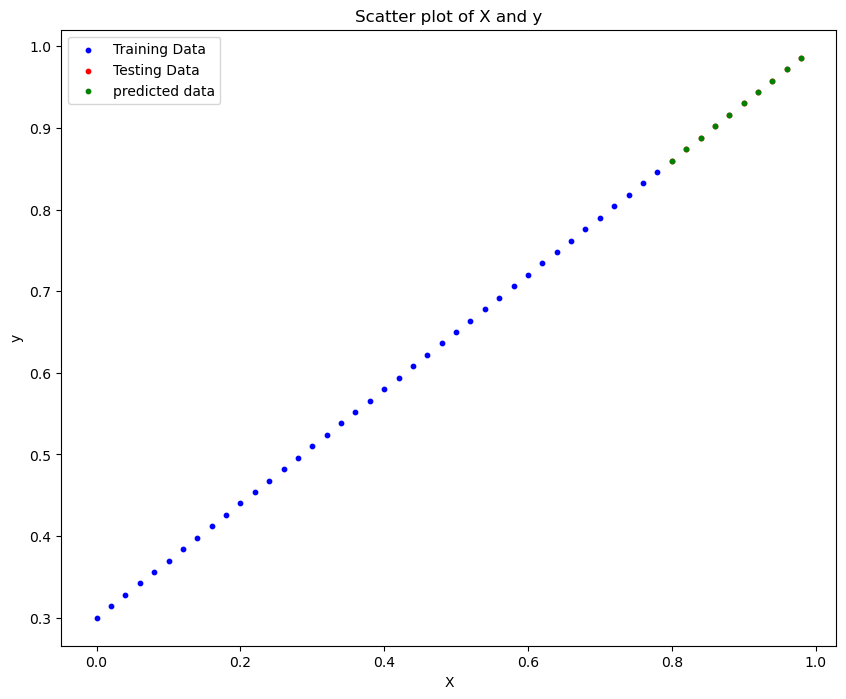

In [12]:
plot_data(predictions=test_pred)

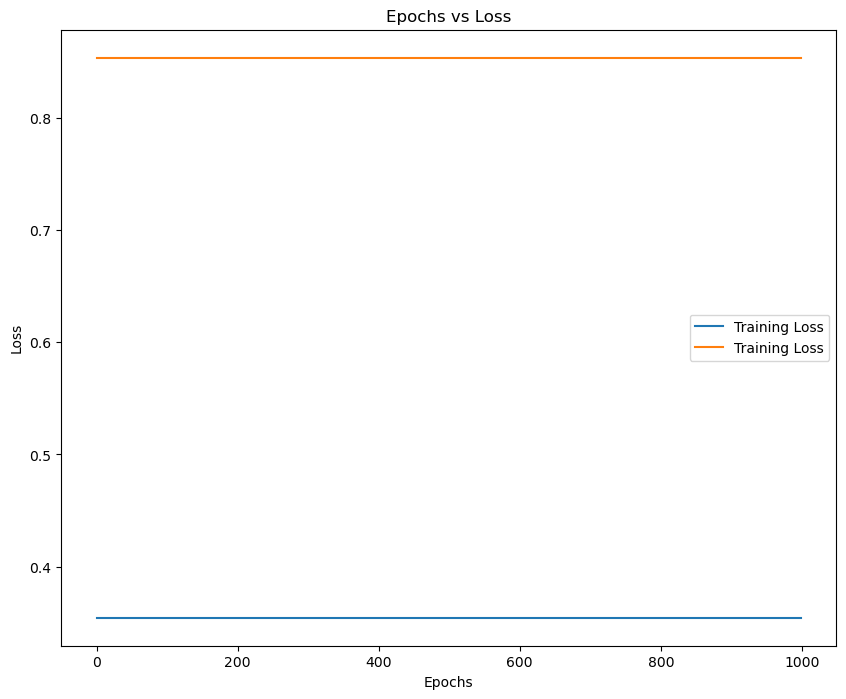

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()